In [1]:
import tensorflow as tf
tf.__version__


'2.19.0'

In [2]:
import tensorflow as tf
print("GPUs Available: ", tf.config.list_physical_devices('GPU'))


GPUs Available:  []


In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: C:\Users\chari\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Correct Path for Windows (your folder structure)
path = r"C:\Users\chari\lung_cancer\lung\image_set\lung_image_sets"

# class folders
classes = ["lung_n", "lung_aca", "lung_scc"]

data = []
labels = []

print("Loading images... please wait.")

for label_index, category in enumerate(classes):
    folder = os.path.join(path, category)
    print(f"Reading folder: {folder}")
    
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        data.append(img)
        labels.append(label_index)

print("Finished loading images.")

# Convert
data = np.array(data) / 255.0
labels = np.array(labels)
labels = to_categorical(labels, num_classes=len(classes))

# Split
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2
)

model.evaluate(X_test, y_test)


Loading images... please wait.
Reading folder: C:\Users\chari\lung_cancer\lung\image_set\lung_image_sets\lung_n
Reading folder: C:\Users\chari\lung_cancer\lung\image_set\lung_image_sets\lung_aca
Reading folder: C:\Users\chari\lung_cancer\lung\image_set\lung_image_sets\lung_scc
Finished loading images.


C:\Users\chari\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 207s 675ms/step - accuracy: 0.6898 - loss: 0.7092 - val_accuracy: 0.8908 - val_loss: 0.2731
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 229s 763ms/step - accuracy: 0.8877 - loss: 0.2899 - val_accuracy: 0.9112 - val_loss: 0.2262
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 217s 724ms/step - accuracy: 0.8903 - loss: 0.2694 - val_accuracy: 0.9187 - val_loss: 0.2096
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 211s 703ms/step - accuracy: 0.9033 - loss: 0.2225 - val_accuracy: 0.9096 - val_loss: 0.2276
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 240s 799ms/step - accuracy: 0.9065 - loss: 0.2227 - val_accuracy: 0.8604 - val_loss: 0.3828
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 236s 788ms/step - accuracy: 0.9020 - loss: 0.2310 - val_accuracy: 0.9117 - val_loss: 0.2129
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 250s 750ms/step - accuracy: 0.9099 - loss: 0.2047 - val_accuracy: 0.9287 - val_loss: 0.1776
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 231s 772ms/step - accuracy: 0.9298 -

[0.21570251882076263, 0.9193333387374878]

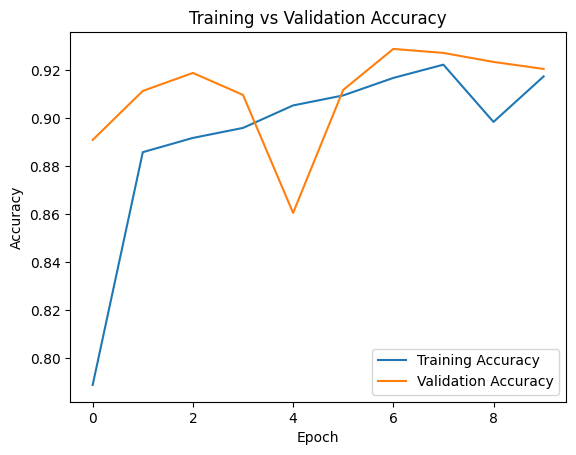

In [5]:
#Training Accuracy Graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


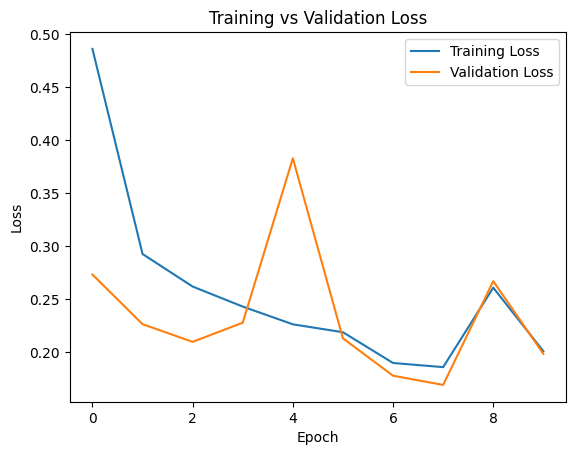

In [6]:
#. Training Loss Graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step


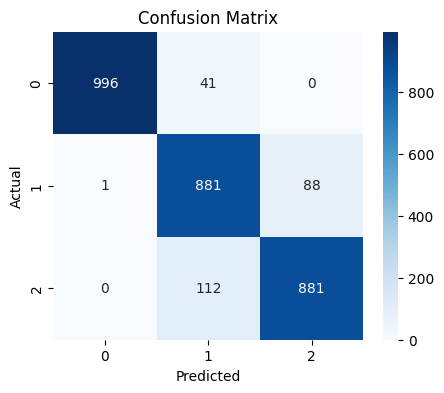

In [7]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
#Classification Report (Precision, Recall, F1)
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes, 
                            target_names=["lung_n", "lung_aca", "lung_scc"]))


              precision    recall  f1-score   support

      lung_n       1.00      0.96      0.98      1037
    lung_aca       0.85      0.91      0.88       970
    lung_scc       0.91      0.89      0.90       993

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



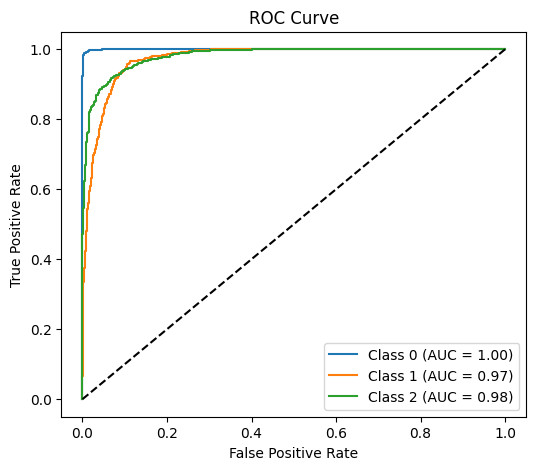

In [9]:
#ROC Curve (One-vs-Rest for each class)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(6,5))

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


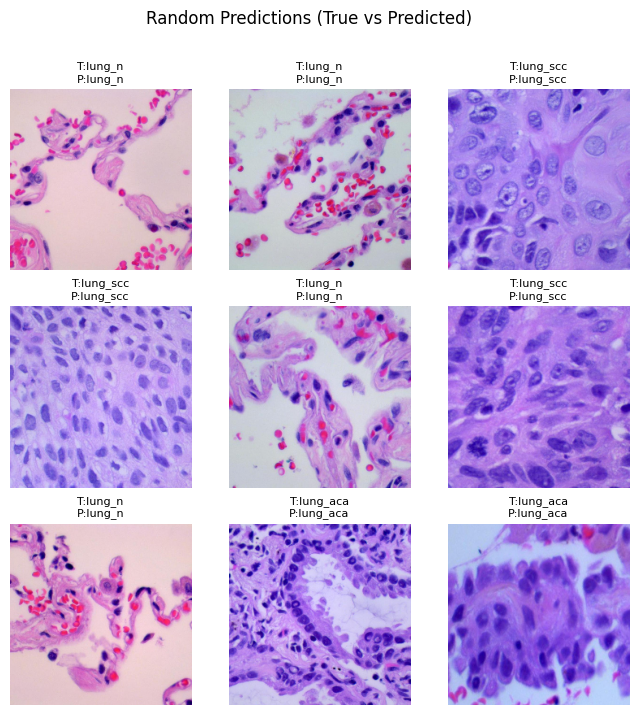

In [10]:
#Random Sample Predictions Visualization
import random

indices = random.sample(range(len(X_test)), 9)

plt.figure(figsize=(8,8))

for i, idx in enumerate(indices):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')

    true_label = ["lung_n", "lung_aca", "lung_scc"][np.argmax(y_test[idx])]
    pred_label = ["lung_n", "lung_aca", "lung_scc"][np.argmax(y_pred[idx])]

    plt.title(f"T:{true_label}\nP:{pred_label}", fontsize=8)

plt.suptitle("Random Predictions (True vs Predicted)", fontsize=12)
plt.show()
